# Исследование поведения клиентов оператора

Заказчик — кредитный отдел банка - компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

__Описание тарифов:__

1. Тариф «Смарт»
    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
    
    
2. Тариф «Ультра»
    - Ежемесячная плата: 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
    
    
__Примечание:__
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


__Описание данных:__


1. Таблица users (информация о пользователях):


    - `user_id` — уникальный идентификатор пользователя
    - `first_name` — имя пользователя
    - `last_name` — фамилия пользователя
    - `age` — возраст пользователя (годы)
    - `reg_date` — дата подключения тарифа (день, месяц, год)
    - `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - `city` — город проживания пользователя
    - `tarif` — название тарифного плана<br>
<br>
1. Таблица calls (информация о звонках):

    - `id` — уникальный номер звонка
    - `call_date` — дата звонка
    - `duration` — длительность звонка в минутах
    - `user_id` — идентификатор пользователя, сделавшего звонок<br>
<br>
2. Таблица messages (информация о сообщениях):

    - `id` — уникальный номер звонка
    - `message_date` — дата сообщения
    - `user_id` — идентификатор пользователя, отправившего сообщение<br>
<br>
3. Таблица internet (информация об интернет-сессиях):

    - `id` — уникальный номер сессии
    - `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - `session_date` — дата интернет-сессии
    - `user_id` — идентификатор пользователя<br>
<br>
4. Таблица tariffs (информация о тарифах):

    - `tariff_name` — название тарифа
    - `rub_monthly_fee` — ежемесячная абонентская плата в рублях
    - `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
    - `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
    - `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
    - `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Оглавление:
* [Подготовка окружения](#prepare)
* [Изучение данных из файла](#open)
* [Предобработка данных](#prepare_data)
    * [Постановка задачи](#prepare_task)
    * [Изменение типа данных](#change)
    * [Исправление ошибок](#errors)
    * [Расчёты](#calculations)
    * [Вывод](#prepare_conclusion)
* [Исследовательский анализ данных](#eda_part)
    * [Постановка задачи](#eda_task)
    * [Исследовательский анализ данных](#eda)
    * [Вывод](#eda_conclusion)
* [Проверка гипотез](#hipotesis)
    * [Постановка задачи](#hipotesis_task)
    * [Различие тарифов](#tariff)
    * [Различие пользователей в зависимости от города](#town)
    * [Вывод](#hipotesis_conclusion)
* [Общий вывод](#conclusion)

### Цель исследования – проверить гипотезы:
 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
 2. Cредняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.
 
### Ход исследования:
 1. Обзор данных:
 2. Подготовка данных.
 3. Исследовательский анализ.
 4. Проверка гипотез.

### Подготовка окружения <a class="anchor" id="prepare"></a>
Загрузим все библиотеки, требуемые для работы в ходе проекта в рамках одной ячейки.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

---

## 1. Открытие файла с данными и изучение информации о данных <a class="anchor" id="open"></a>

Загрузим файлы с данными, предоставленные для исследования.

In [4]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except FileNotFoundError:
    calls = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов
    internet = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов
    messages = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов
    tariffs = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов
    users = pd.read_csv('-') # Прямая ссылка на датасет удалена в связи с правилами публикации проектов

Изучим информацию в файлах по очереди с их статистической и обзорной информацией.

In [5]:
display(calls.head())
calls.info()
calls.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Также отобразим статистическую и обзорную информацию о файлах.

In [6]:
display(internet.head())
internet.info()
internet.describe()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [7]:
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
display(users.head())
users.info()
users.describe()
users.groupby(by='tariff').count()['user_id']

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


tariff
smart    351
ultra    149
Name: user_id, dtype: int64

In [9]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


По результатам изучения первичной информации можно сделать следуующие наблюдения:

1. В данных нет пропусков, за исключением пропусков даты прекращения договора, которые означают, что клиент не отказался от услуг оператора.

2. В таблице звонков есть нулевые значения, означающие пропущенные вызовы. Также нулевые значения есть в таблице расхода интернет трафика - это может быть ошибкой. Нулевые значения могут быть как неудавшейся сессией, когда подключиться к интернету не удалось, либо ошибкой в данных.

3. В таблице звонков минуты сохранены в вещественном виде, тогда как Мегалайн округляет их в большую сторону. Следует округлить и записать их в целочисленном виде.

4. Значения дат хранятся в строковом виде, их необходимо перевести в тип datetime.

## 2. Подготовка данных <a class="anchor" id="prepare_data"></a>


### Постановка задачи <a class="anchor" id="prepare_task"></a>

В рамках подготовки данных необходимо провести следующую предобработку:
- изменить тип хранения дат в таблицах на datetime;
- округлить значения длительности звонка в большую сторону и привести к целочисленному виду;
- провести следующие расчеты:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя


### Изменение типа данных <a class="anchor" id="change"></a>


 Изменим тип хранения дат в каждой из таблиц.

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Тип хранения был изменен.

### Исправление ошибок <a class="anchor" id="errors"></a>


Округлим записанные в вещественном виде значения длительности звонка в большую сторону и приведем к целочисленному виду.

In [11]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = pd.to_numeric(calls['duration'], downcast='integer')

Проверим округление.

In [12]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Теперь данные о длительности звонка хранятся в целочисленном виде, округленные в большую сторону.

### Расчёты <a class="anchor" id="calculations"></a>


Проведем необходимые расчеты для пользователей.

Посчитаем количесто сделанных звонков.

In [13]:
users = users.merge(calls.groupby(by='user_id').count()['id'], on='user_id', how='outer')
users.rename(columns={'id':'number_of_calls'}, inplace=True)

Посчитаем количество израсходованных минут по месяцам.

In [14]:
calls['month'] = calls['call_date'].dt.month
pivot_month_calls = pd.pivot_table(calls, values='duration', index=['user_id', 'month'], aggfunc='sum')

Количество отправленных сообщений по месяцам.

In [15]:
messages['month'] = messages['message_date'].dt.month
pivot_month_messages = pd.pivot_table(messages, values='message_date', index=['user_id', 'month'], aggfunc='count')

Количество израсходованного трафика по месяцам.

In [16]:
internet['month'] = internet['session_date'].dt.month
pivot_month_internet = pd.pivot_table(internet, values='mb_used', index=['user_id', 'month'], aggfunc='sum')

И соберем получившиеся таблицы в одну

In [17]:
pivot_month = (
    pivot_month_calls.reset_index()
    .merge(pivot_month_messages.reset_index(), how='outer')
    .merge(pivot_month_internet.reset_index(), how='outer')
)
pivot_month.head()

,user_id,month,duration,message_date,mb_used
0,1000,5,159.0,22.0,2253.49
1,1000,6,172.0,60.0,23233.77
2,1000,7,340.0,75.0,14003.64
3,1000,8,408.0,81.0,14055.93
4,1000,9,466.0,57.0,14568.91


In [18]:
pivot_month

,user_id,month,duration,message_date,mb_used
0,1000,5,159.0,22.0,2253.49
1,1000,6,172.0,60.0,23233.77
2,1000,7,340.0,75.0,14003.64
3,1000,8,408.0,81.0,14055.93
4,1000,9,466.0,57.0,14568.91
...,...,...,...,...,...
3209,1489,9,NaN,32.0,17206.30
3210,1489,10,NaN,21.0,19559.44
3211,1489,11,NaN,20.0,17491.56
3212,1489,12,NaN,35.0,17322.51


Добавим в таблицу данные о пользователях.

In [19]:
monthly_users_data = users.merge(pivot_month, how='outer').merge(tariffs, how='outer')
monthly_users_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,number_of_calls,month,duration,message_date,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,5.0,159.0,22.0,2253.49,1000,30720,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,6.0,172.0,60.0,23233.77,1000,30720,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,7.0,340.0,75.0,14003.64,1000,30720,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,8.0,408.0,81.0,14055.93,1000,30720,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,9.0,466.0,57.0,14568.91,1000,30720,3000,1950,150,1,1


Рассчитаем перерасход минут, трафика и смс сверх пакета.

In [20]:
monthly_users_data['messages_overlimit'] = monthly_users_data['message_date'] - monthly_users_data['messages_included']
monthly_users_data.loc[monthly_users_data['messages_overlimit'] < 0, ['messages_overlimit']] = 0
monthly_users_data['gb_overlimit'] = ((monthly_users_data['mb_used'] - monthly_users_data['mb_per_month_included']) / 1024).apply(np.ceil)
monthly_users_data.loc[monthly_users_data['gb_overlimit'] < 0, ['gb_overlimit']] = 0
monthly_users_data['calls_overlimit'] = (monthly_users_data['duration'] - monthly_users_data['minutes_included'])
monthly_users_data.loc[monthly_users_data['calls_overlimit'] < 0, ['calls_overlimit']] = 0

Проверим, все ли значения заполнены, что бы не упустить часть данных пользователей, которые не отправляли смс ии не делали звонков.

In [21]:
monthly_users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 23 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
number_of_calls          3176 non-null float64
month                    3214 non-null float64
duration                 3174 non-null float64
message_date             2717 non-null float64
mb_used                  3203 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute 

Действительно, в столбцах `messages_overlimit`, `gb_overlimit` и `calls_overlimit` появились пустые значения, обусловленные тем, что часть пользователей не делали звонков или не отправляли сообщений. Заполним такие пустые значения нулями.

In [22]:
monthly_users_data['messages_overlimit'].fillna(0, inplace=True)
monthly_users_data['gb_overlimit'].fillna(0, inplace=True)
monthly_users_data['calls_overlimit'].fillna(0, inplace=True)

Рассчитаем выручку с каждого пользователя в каждом месяце. Добавим к абонентской плате перерасход умноженный на стоимость перерасхода по тарифному плану. Сразу удалим лишние столбцы, не требующиеся для дальнейшего анализа.

In [23]:
monthly_users_data['monthly_profit'] = (monthly_users_data['rub_monthly_fee'] +
                                        monthly_users_data['messages_overlimit'] * monthly_users_data['rub_per_message'] +
                                        monthly_users_data['gb_overlimit'] * monthly_users_data['rub_per_gb'] +
                                        monthly_users_data['calls_overlimit'] * monthly_users_data['rub_per_minute'])
monthly_users_data.drop(['messages_included', 'mb_per_month_included', 'minutes_included',
                         'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
                         'messages_overlimit', 'gb_overlimit', 'calls_overlimit'], axis=1, inplace=True)



Получившаяся таблица выглядит следующим образом.

In [24]:
monthly_users_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,number_of_calls,month,duration,message_date,mb_used,monthly_profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,5.0,159.0,22.0,2253.49,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,6.0,172.0,60.0,23233.77,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,7.0,340.0,75.0,14003.64,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,8.0,408.0,81.0,14055.93,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,368.0,9.0,466.0,57.0,14568.91,1950.0


### Вывод <a class="anchor" id="prepare_conclusion"></a>


Таблица готова для анализа, необходимая предобработка проведена, а также сделаны нужные расчетыы.

## 3. Исследовательский анализ данных <a class="anchor" id="eda_part"></a>


### Постановка задачи <a class="anchor" id="eda_task"></a>

В рамках исследовательского анализа данных необходимо сформировать портреты клиентов по каждому из тарифов и выполнить следующее:

- ответить, сколько минут разговора, сообщений, объем трафика требуется пользователям каждого из тарифов в месяц?
- посчитать статистические параметры пользователей тарифов;
- визуализировать и описать распределения.

### Исследовательский анализ данных <a class="anchor" id="eda"></a>


Для начала построим гистограммы распределения использования интернета, сообщений и звонков. Для гистограммы, что быы исключить сезонность, возьмем среднемесячные значения, а не по месяцам отдельно.

In [25]:
average_users_data = (monthly_users_data.groupby(['user_id', 'tariff'])
                      .mean().drop('month', axis=1)
                      .reset_index(level=1))

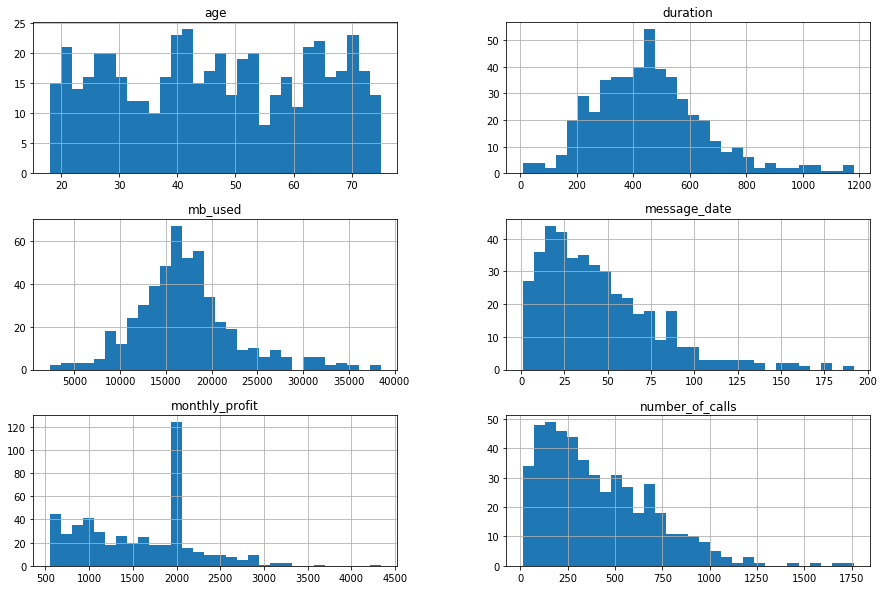

In [26]:
average_users_data.hist(figsize=(15, 10), bins=30)
plt.show()

По гистограмме возраста можно заметить, что выборка абонентов, вероятнее всего была взята стратифицировано - возраст клиентов не соответствует нормальному распредлелению, а также нет тенденции снижения количества абонентов с увеличением возраста, хотя это было бы ожидаемо и закономерно не только из-за естественных причин, но и за счет распространения мобильных устройств среди населения - люди в возрасте реже пользуются мобильными устройствами и зачастую имеют только стационарный телефон.

Гистограмма количества звонков и сообщений в среднем за месяц у абонентов очень похожи и распределены нормально, но сильно скошены вправо. В таком случае среднее значение окажется больше медианы, соотвественнно медиана для данных параметров более репрезентативный показатель.

Гистограммы количества использованных минут и интернета также очень похожи, тоже распределены нормально, но уже скошенности. Соответственно для них, в отсутствие выбросов подходит использование средней величины.

Гистограмма выручки не похожа на нормальное распределение, что ожидаемо. Часть абонентов обходятся включенным в тариф количеством траффика, минут и сообщений, это видно по двум пикам в районе 550 и 1950 рублей. Как мы знаем из обзора данных, 351 абонент пользуется тарифом Smart, а 149 - тарифом Ultra. Поэтому из графика можно сделать вывод, что тариф Ultra в значительно большей мере удовлетворяет требования большинства клиентов включенными в тариф пакетами. Пик около 1950 рублей существенно выше, чем около 550 рублей, следовательно абоненты тарифа Ultra чаще обходятся встроенными пакетами.

Для того, что бы точно определить удовлетворенность потребностей клиентов встроенными пакетами, построим гистограммы отдельно для каждого тарифа.

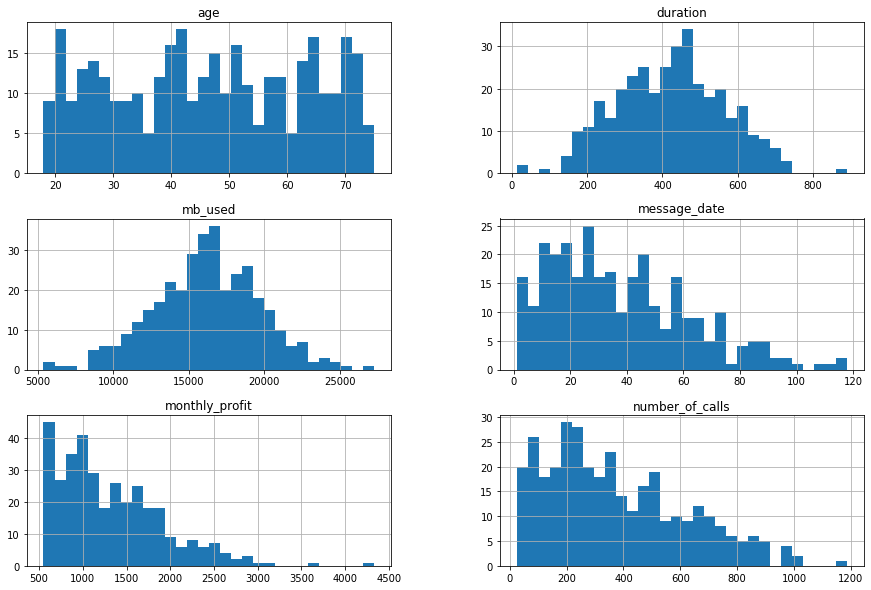

In [27]:
average_users_data[average_users_data['tariff'] == 'smart'].hist(figsize=(15, 10), bins=30)
plt.show()

Для тарифа Smart гистограммы очень похожи на общие по выборке, что ожидаемо, так как клиентов с этим тарифом более чем вдвое больше. Однако на гистограмме выручки с клиента заметно отсутствие такого большого пика в районе 1950 рублей, следовательно он обусловлен выручкой клиентов с тарифом Ultra.
Скошенность гистограммы выручки очень плавная, большое количество клиентов вынуждены платить за перерасход сверх включенных пакетов.  

В тариф включено 500 минут разговора и это чуть больше среднего значения на гистограмме, следовательно колличества включенных минут хватает чуть больше чем половине пользователей.

Аналогичная ситуация с количеством использованного интернета. Однако тут включенные 15 гигобайт трафика меньше среднего значения, то есть чуть меньше половины пользователей укладывается во включеннный пакет интернета.

Количество включенных смс - 50 в месяц - уже намного больше подходит пользователям, так как покрывает потребность большей части клиентов.

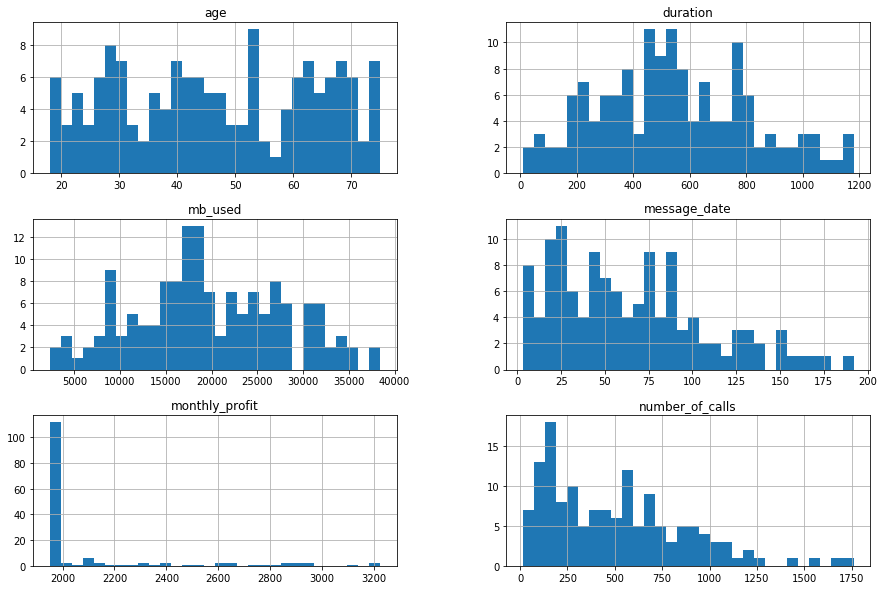

In [28]:
average_users_data[average_users_data['tariff'] == 'ultra'].hist(figsize=(15, 10), bins=30)
plt.show()

Тариф Ultra, покрывает потребности ~ 70% клиентов - на графике выручки с клиента есть ощутимый пик почти в районе 1950 рублей - 90 из 149 клиентов не нуждаются в дополнительных минутах, сообщениях и гигабайтах.

Это подтверждается графиком среднго количестваа израсходованных минут - максимальное значения не доходит до 1200, следовательно включение 3000 минут - избыточно, а ресурсы, рассчитанные на поддержание избыточной пропускной способности сети, можно было бы перераспределить на прочие услуги, к примеру интернета. Это позволило бы предоставлять лучший сервис, не увеличивая финансовую нагрузку на клиентов.

Аналогичная ситуация со средним количеством сообщений. Предел графика - 200 сообщений в месяц при включенной 1000. Пакет избыточен, клиентам нет необходимости в таком большом количестве сообщений.

Пакет интернета, однако не покрывает потребности всех пользователей. Около 15% пользователей тратят больше включенных 30 гигабайт трафика.

Для двух тарифов и всей выборки построим таблицы статистических показателей и соберем в одну.

In [29]:
whole = average_users_data.describe(percentiles=(.1, .997)).loc[('mean', 'std', '50%', '99.7%'),].T
whole['var'] = whole['std'] ** 2
smart = average_users_data[average_users_data['tariff'] == 'smart'].describe(percentiles=(.1, .997)).loc[('mean', 'std', '50%', '99.7%'),].T
smart['var'] = smart['std'] ** 2
ultra = average_users_data[average_users_data['tariff'] == 'ultra'].describe(percentiles=(.1, .997)).loc[('mean', 'std', '50%', '99.7%'),].T
ultra['var'] = ultra['std'] ** 2

In [32]:
tariffs_comparison = whole.join(smart, rsuffix='_smart', lsuffix='_whole').join(ultra)
to_rename = {'mean_whole': 'Среднее по выборке',
             'std_whole': 'Стандартное отклонение по выборке',
             '50%_whole': 'Медиана по выборке',
             '99.7%_whole': '3 сигмы по выборке',
             'var_whole': 'Дисперсия по выборке',
             'mean_smart': 'Среднее по тарифу "Смарт"',
             'std_smart': 'Стандартное отклонение по тарифу "Смарт"',
             '50%_smart': 'Медиана по тарифу "Смарт"',
             '99.7%_smart': '3 сигмы по тарифу "Смарт"',
             'var_smart': 'Дисперсия по тарифу "Смарт"',
             'mean': 'Среднее по тарифу "Ультра"',
             'std': 'Стандартное отклонение по тарифу "Ультра"',
             '50%': 'Медиана по тарифу "Ультра"',
             '99.7%': '3 сигмы по тарифу "Ультра"',
             'var': 'Дисперсия по тарифу "Ультра"'}
tariffs_comparison = tariffs_comparison.rename(columns=to_rename).T.sort_index()

Отобразим получившуюся таблицу на экране и сравним статистические показатели для различных выборок - полной, тарифа Smart и тарифа Ultra.

In [34]:
pd.options.display.float_format = '{:.2f}'.format
tariffs_comparison

,age,number_of_calls,duration,message_date,mb_used,monthly_profit
3 сигмы по выборке,75.00,1629.56,1169.82,175.18,36868.54,3428.04
"3 сигмы по тарифу ""Смарт""",75.00,1008.00,723.17,116.19,25593.81,3603.71
"3 сигмы по тарифу ""Ультра""",75.00,1731.03,1175.80,186.10,38335.17,3225.00
Дисперсия по выборке,277.81,85149.21,38685.78,1132.79,31265558.67,406513.31
"Дисперсия по тарифу ""Смарт""",274.91,59512.41,20584.70,617.51,12796469.68,367944.30
"Дисперсия по тарифу ""Ультра""",286.42,136103.33,72005.48,1882.75,66762354.02,88644.59
Медиана по выборке,46.00,344.50,446.65,38.00,16712.43,1617.88
"Медиана по тарифу ""Смарт""",47.00,324.00,425.25,33.00,16267.38,1176.40
"Медиана по тарифу ""Ультра""",46.00,444.00,525.50,57.80,18829.49,1950.00
Среднее по выборке,46.59,411.80,457.42,45.43,17236.32,1549.67


На основе таблицы можно сделать следующие выводы:


1. Показатели для возраста практически не отличаются, следовательно нет значительных различий по этому параметру.


2. По количеству звонков тариф "Ультра" сильно опережает тариф "Смарт", при этом среднее по общей выборке сильнее тяготеет к среднему по тарифу "Ультра", а медиана в меньшей степени. Также дисперсия и стандартное отклонение тарифа "Ультра" намного больше этих показателей для тарифа "Смарт" и общей выборки. Это свидетельствует о том, что распределение по тарифу "Ультра" имеет значительно больший разброс, чем по тарифу "Смарт" и тянет за собой параметрический показатель среднего. Следовательно выборка тарифа "Смарт" более гомогенна и приближена к нормальному распределению.

    3 сигмы, то есть количество звонков, которое больше 99,7% выборки, также у тарифа "Ультра" намного больше тарифа "Смарт". Это закономерное следствие того, что этот тариф чаще выбирают клиенты, соввершающие больше зваонков, а тариф "Смарт" выбирают клиенты, как правило обходящиеся меньшим количеством звонков в месяц.
    
    Таким образом предположение, что медиана репрезентативнее среднего для портрета средннестатистического клиента для показателя количества звонков подтверждается.
    
    
3. Длительность звонков напротив имеет намного меньший разброс, при большем среднем, стандартное отклонение примерно вдвое меньше стандартного отклонения. Распределение существенно ближе к нормальному, не скошенному, однако для тарифа "Ультра" оно все еще имеет больший разброс, чем для тарифа "Смарт".
    
    Как и с медианой для количества звонков, для их длительности подтверждается целесообразность предложения использовать среднее.


4. Распределение для количества смс в месяц примерно аналогично распределению количества звонков. Имет большой разброс, для тарифа "Ультра" существенно выше, чем для тарифа "Смарт". Таким образом для портрета клиента будем использовать, также как и для количества звонков, медиану, для оценки типичного количества сообщений в месяц.


5. Распределение использования интернета больше напоминает распределение длительности звонков. Разброс меньший и среднее близко к медиане. Для тарифа "Ультра" разброс больший, чем для тарифа "Смарт". Для портрета клиента будем использовать среднее значение показателя.


6. Распределение выручки с клиента отличается противоположными показателями для тарифов "Ультра" и "Смарт". Разброс для тарифа "Смарт" выше, чем для тарифа "Ультра". Следовательно тариф "Ультра" в большей степени соответствует требованиям клиентов, чем тариф "Смарт", однако для среднестатистического клиента тарифа "Смарт" невыгодно переходить на тариф "Ультра", так как его затраты в месяц все еще ниже затрат клиенты тарифа "Ультра".

Составим портрет среднестатистического клиента тарифа "Ультра" и клиента тарифа "Смарт" и оценим, насколько пакеты услуг тарифов отвечают этим средним характеристикам. От этого зависит уровень сервиса и удовлетворенность клиентов используемыми тарифами.

1. Тариф «Смарт»:
    - абоненту 46-47 лет;
    - он совершает около 324 звонков в месяц;
    - при этом он тратит около 421 минуты на разговоры в месяц, при включенных 500 минутах разговора;
    - отправляет 33 из 50 включенных сообщений;
    - тратит 16,2 Гб интернет-трафика из включенных 15 Гб;
    - тратит около 1200 рублей в месяц на связь, из которых 550 - абонентская плата;
    
    Таким образом клиенты значительно переплачивают, так как около половины клиентов используют большее количество минут, сообщений и трафика, чем включенное количество.

    
2. Тариф «Ультра»:
    - абоненту 46-47 лет;
    - он совершает около 444 звонков в месяц;
    - средняя суммарная длительность которых около 546 минут из 3000 минут разговора, включенных в тариф;
    - отправляет 58 из 1000 включенных в тариф сообщений;
    - тратит 19,8 Гб интернет-трафика из включенных 30 Гб;
    
    Клиент тарифа "Ультра" переплачивает также, так как платит за невостребованные остатки по пакетам, используя незначительное количество сообщений и небольшое количествов включенных минут и чуть больше половины от включенного пакета интернета.

Более оптимальными пакетами были бы:

1. Тариф «Смарт»:
    - 500 минута разговора;
    - 50 сообщений;
    - 17 Гб интернет-трафика;
    - 550 рублей - абонентская плата;


1. Тариф «Медиум»:
    - 800 минут разговора;
    - 120 сообщений;
    - 26 Гб интернет-трафика;
    - 1000 рублей в месяц;


2. Тариф «Ультра»:
    - 1200 минут разговора;
    - 200 сообщений;
    - 40 Гб интернет-трафика;
    - 1950 рублей в месяц.

### Вывод <a class="anchor" id="eda_conclusion"></a>


По результатам исследования данных можно сказать, что типичные абоненты тарифов "Смарт" и "Ультра" различаются по объему потребления, но абоненты обоих тарифов платят больше, чем необходимо. Абоненты тарифа "Смарт" переплачивают, используя трафик сверх пакета по большей стоимости, чем в пакете, а абоненты тарифа "Ультра" переплачивают, не используя весь включенный в их тариф объем минут, интернета и смс. Можно сказать, что абоненты обоих тарифов нуждаются в некотором промежуточном тарифе, который полностью бы покрывал их потребности и предлагал бы компромиссную цену.

## 4. Проверка гипотез <a class="anchor" id="hipotesis"></a>


### Постановка задачи <a class="anchor" id="hipotesis_task"></a>


Так как мы выяснили, что абоненты двух тарифов различаются, нам необходимо закрепить уверенность в этом с использованием статистического аппарата. Также нам необходимо выяснить, различаются ли выручки пользователей из Москвы и регионов.

Сформируем по две гипотезы к каждой из задач:

- различие абонентов по тарифам:
    - H0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" одинаковы
    - H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются
- различие абонентов по городам:
    - H0 - средняя выручка пользователей из Москвы и регионов одинакова
    - H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


Нулевые гипотезы сформулированы из предположения, что разницы между выборками нет.


Альтернативные гипотезы сформулированы из предположения, что средние выручки пользователей двух тарифов различаются. Так как мы не заем точно, что выручка по одной и ли другой выборке будет однозначно больше, а главная цель исследования - выяснить, различаются ли выборки, целесообразно проверять именно с такими гипотезами.


Обе гипотезы двусторонние. Пороговое значение параметра alpha зададим на общепринятом уровне - 0,05.


Использовать для проверки гипотез будем p-value - показатель, который определяет вероятность того, что среднее значение одной выборки окажется в пределах нормального распределения второй выборки. Сравнивать его будем с заданным значением alpha. То есть если нулевая гипотеза верна, среднее значение одной выборки окажется в пределах примерно двух сигм от среднего значения второй выборки.

### Различие тарифов <a class="anchor" id="tariff"></a>


Выполним проверку гипотезы с помощью инструментария модуля scipy.

In [35]:
alpha = .05

result = st.ttest_ind(
    monthly_users_data[monthly_users_data['tariff'] == 'ultra']['monthly_profit'],
    monthly_users_data[monthly_users_data['tariff'] == 'smart']['monthly_profit']
)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние значения абонентов тарифов "Ультра" и "Смарт" различаются.')
else:
    print('Принимаем нулевую гипотезу. Средние значения абонентов тарифов "Ультра" и "Смарт" одинаковы.')

p-value: 8.081909555489933e-161
Отвергаем нулевую гипотезу. Средние значения абонентов тарифов "Ультра" и "Смарт" различаются.


### Различие пользователей в зависимости от города <a class="anchor" id="town"></a>


Проверим вторую гипотезу.

In [36]:
alpha = .05

result = st.ttest_ind(
    monthly_users_data[monthly_users_data['city'] == 'Москва']['monthly_profit'],
    monthly_users_data[monthly_users_data['city'] != 'Москва']['monthly_profit']
)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние значения абонентов тарифов "Ультра" и "Смарт" различаются.')
else:
    print('Принимаем нулевую гипотезу. Средние значения абонентов из Москвы и регионов одинаковы.')

p-value: 0.5400751614511182
Принимаем нулевую гипотезу. Средние значения абонентов из Москвы и регионов одинаковы.


### Вывод <a class="anchor" id="hipotesis_conclusion"></a>


По результатам проверки гипотез статистическими методами, различие в выручке пользователей из Москвы и регионов не выявлено. Вероятнее всего это обусловлено тем, что связь - базовая потребность в современном мире и меньше зависит от уровня благосостояния, чем потребление прочих благ. Кроме этого стоимость тарифов в Москве и регионах не различается.

Однако выручка от пользователей тарифов "Смарт" и "Ультра" различаются, что также было выявлено на этапе исследовательского анализа данных. Вероятнее всего выручка от пользователей тарифа "Ультра" выше, чем от пользователей тарифа "Смарт".

## 5. Общий вывод <a class="anchor" id="conclusion"></a>

По результатам иссследования можно сделать следующие выводы:

1. Использование интернета, минут и сообщений пользователями тарифов "Смарт" и "Ультра" различаются, как и выручка от пользователей. Выручка от пользователей тарифа "Ультра" выше, чем от тарифа "Смарт". Средний пользователь тарифа "Ультра" платит 1950 рублей в месяц, средний пользователь тарифа "Смарт" платит 1176 рублей.

2. Однако удовлетворенность потребностей абонентов двух тарифов не идеальна. Многим пользователям тарифа "Смарт" не хватает встроенных пакетов, однако тариф "Ультра" для них слишком дорог. В итоге они вынуждены переплачивать за перерасход по большей стоимости, чем могли бы. Многим пользователям тарифа "Ультра" встроенных пакетов слишком много, за счет чего они переплачивают в стоимости тарифа. Целесообразно рассмотреть добавление третьего, усредненного тарифа, который привлечет часть неудовлетворенных пользователей из обоих тарифов. Это позволит повысить удовлетворенность клиентов услугами компании, что позволит привлечь новых за счет сарафанного радио и повысить лояльность текущих.

3. Средняя выручка пользователей из Москвы и регионов не отличается, что говорит о готовности пользователей из регионов платить за услуги связи, независимо от дохода.


Бизнесу следует сконцентрироваться на более прибыльном тарифе "Ультра" и соответсвующим образом скорректировать свою рекламную компанию. Также следует рассмотреть введение третьего тарифа - "Медиум", который привлечет абонентов тарифов "Смарт" и "Ультра" и позволит повысить уровень удовлетворенности клиентов.